In [22]:
#08-01 Unemployment

import pandas as pd
import matplotlib.pyplot as pp
import matplotlib
!pip install plotly
import plotly
import plotly.plotly as py

In [23]:
#sign-in to plotly
py.sign_in('nimazahadat','sPXefZEdMtz38AmjhV1u') #plotly API connection
print(plotly.__version__)
plotly.offline.init_notebook_mode() #run at the start

2.4.1


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [24]:
#read in the csv files and create corresponding data frames
UnemploymentByState = pd.read_csv('UnemploymentByState.csv')
StateFIPS = pd.read_csv('StateFIPS.csv', dtype={'statefips':str})
SuperSector = pd.read_csv('SuperSectors.csv', dtype={'supersector':str})
NationalUnemploymentPercentage = pd.read_csv('NationalUnemploymentPercentage.csv')
EmploymentByStateFor2007 = pd.read_csv('EmploymentByStateFor2007.csv', dtype={'supersector':str})

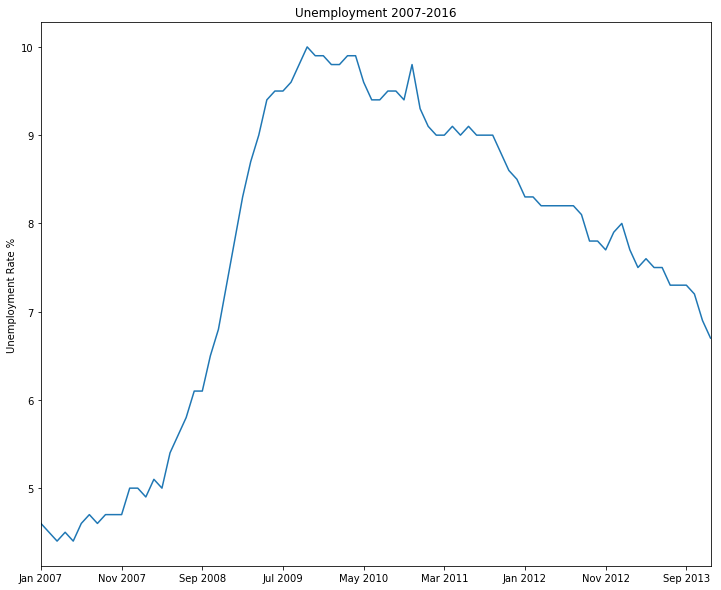

In [25]:
#display the national unemployment rate percentage from 2007 - 2013

NationalUnemploymentTransposed = NationalUnemploymentPercentage.set_index(['Series ID']).transpose()
NationalUnemploymentPlot = NationalUnemploymentTransposed.plot.line(legend=False, figsize=(12,10),
                                        title='Unemployment 2007-2016')
NationalUnemploymentPlot.set_ylabel('Unemployment Rate %')
pp.show()

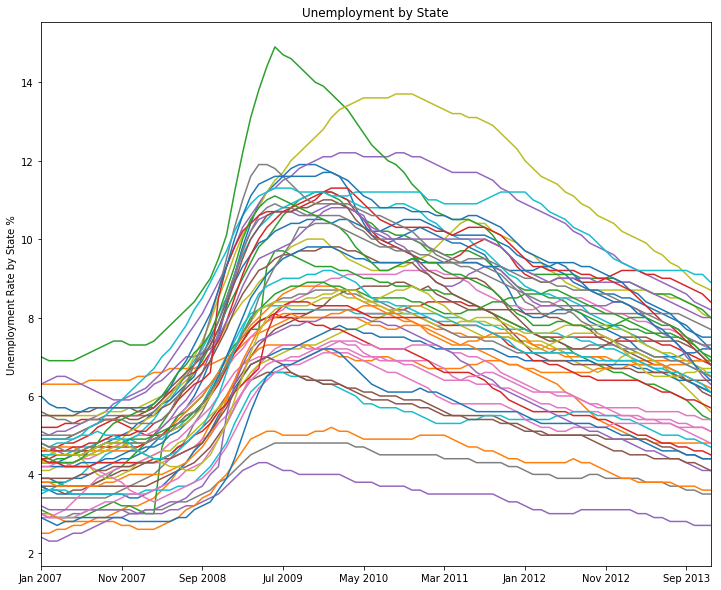

In [26]:
#display the unemployment by state using the FIPS column
#extract the FIPS code and create a new column named statefips
UnemploymentByState['statefips'] = UnemploymentByState.SeriesID.str[5:7]

#merge the two dataframes on statefips and create a new dataframe
UnemploymentByState = pd.merge(UnemploymentByState, StateFIPS, on='statefips')

#drop unneeded columns from the dataframe
UnemploymentByState.drop(['SeriesID','statefips','stateabrev'], axis=1, inplace=True)

UnemploymentByStateTransposed = UnemploymentByState.set_index(['statename']).transpose()
UnemploymentByStatePlot = UnemploymentByStateTransposed.plot.line(legend=False,
                                                                  figsize=(12,10),
                                                                  title='Unemployment by State')
UnemploymentByStatePlot.set_ylabel('Unemployment Rate by State %')
pp.show()

In [27]:
#let's create a new dataframe and a function to draw for a particular state
UnemploymentIndexedByState = UnemploymentByState.set_index('statename')

def drawStateUnemployment(state):
    UnemploymentIndexedByState.loc[state].plot(legend=True, figsize=(10,16),
                                               title='Unemployment 2007-2016')

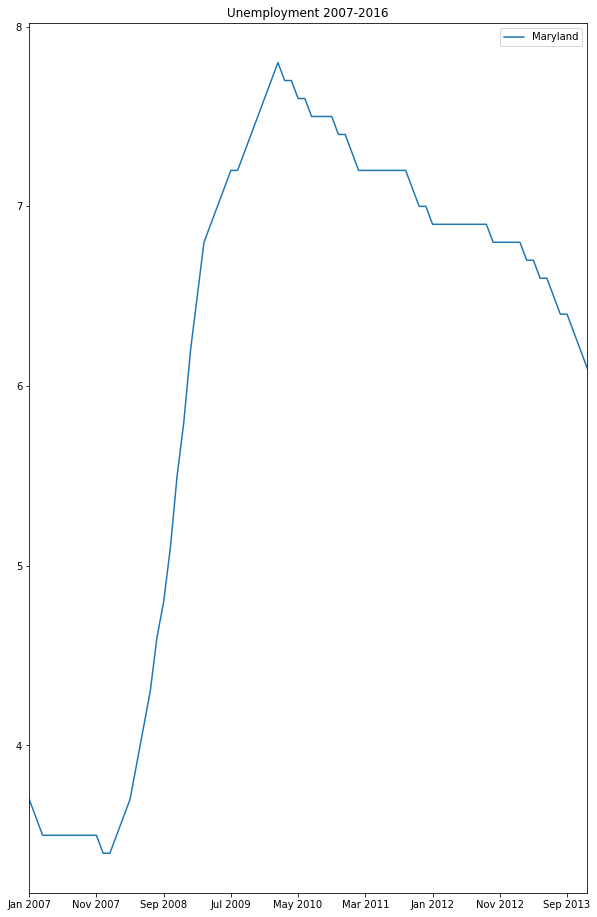

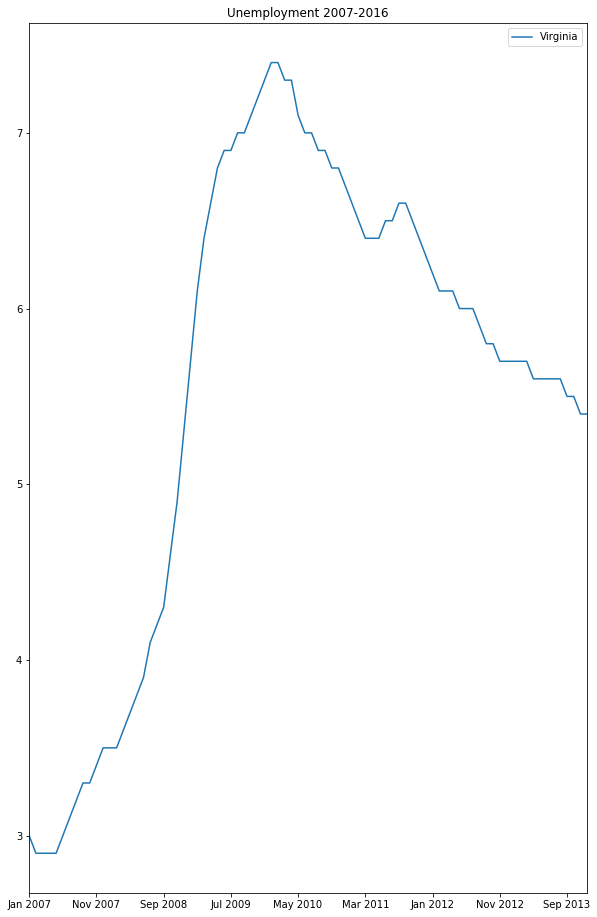

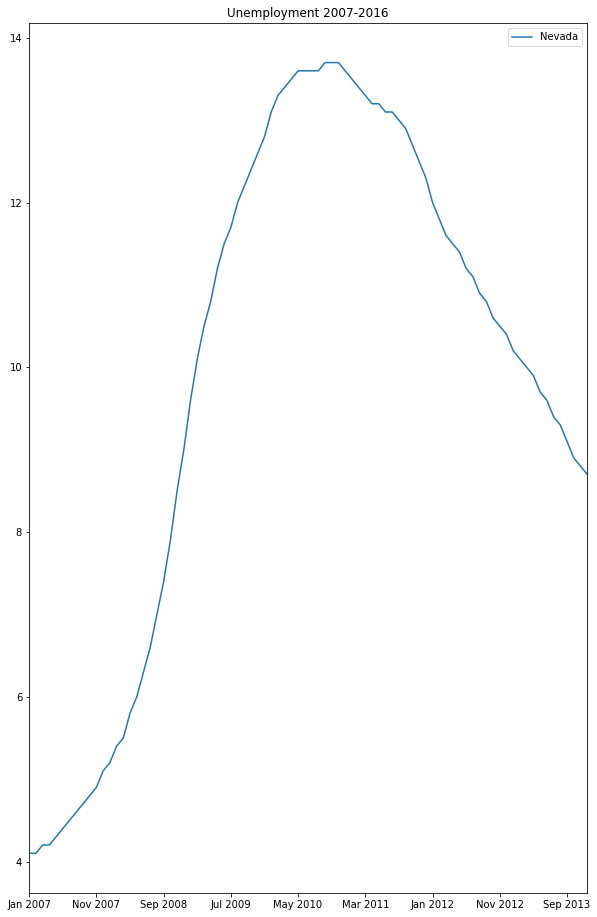

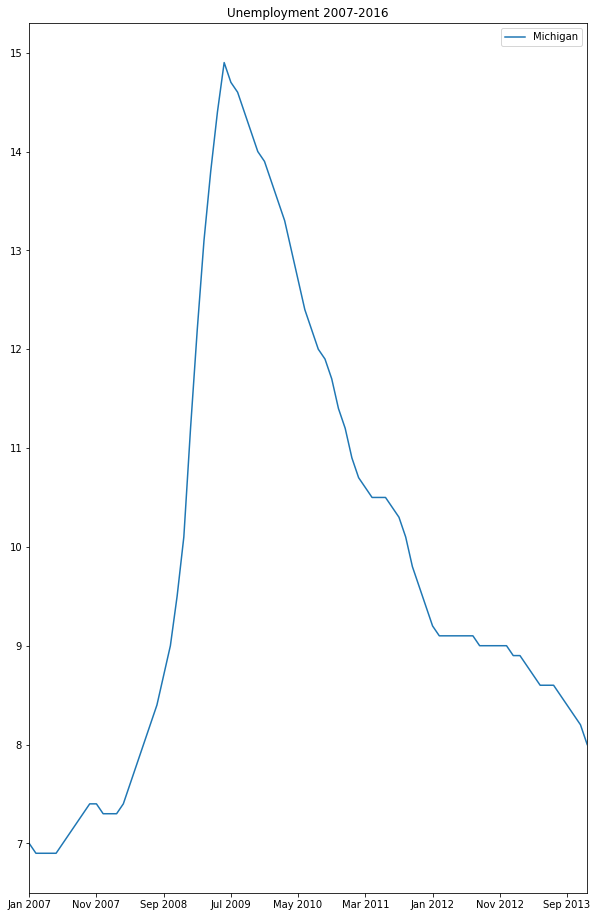

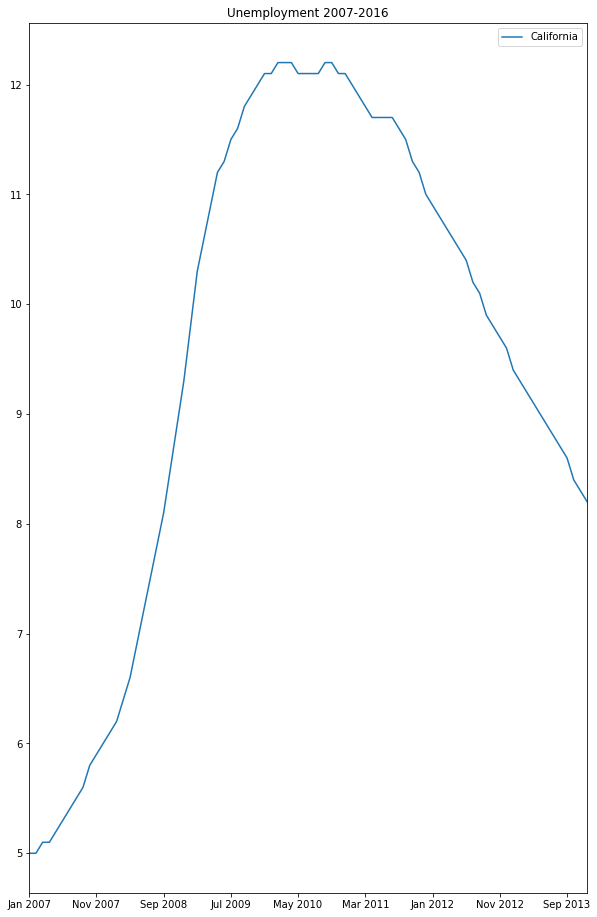

In [29]:
drawStateUnemployment('Maryland')
pp.show()
drawStateUnemployment('Virginia')
pp.show()
drawStateUnemployment('Nevada')
pp.show()
drawStateUnemployment('Michigan')
pp.show()
drawStateUnemployment('California')
pp.show()

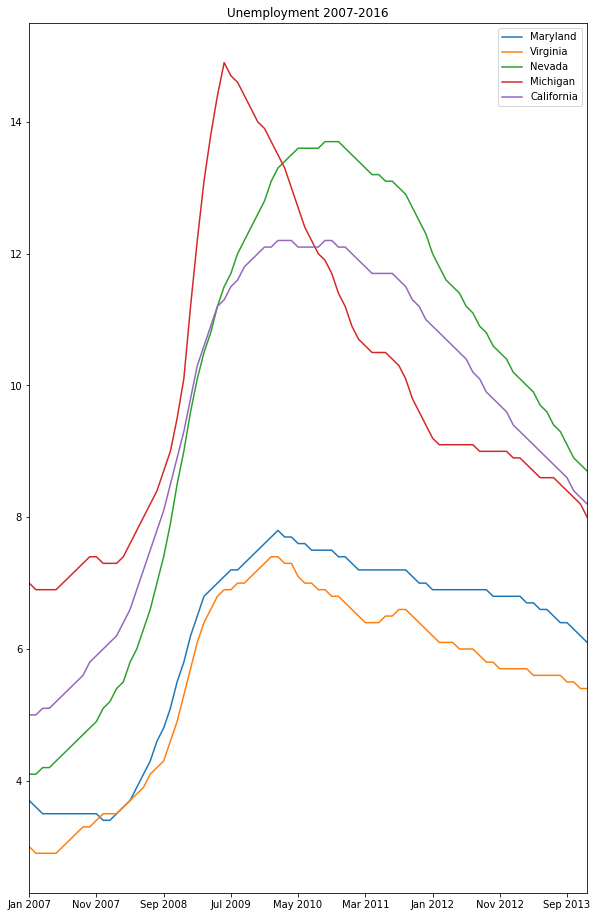

In [30]:
drawStateUnemployment('Maryland')
drawStateUnemployment('Virginia')
drawStateUnemployment('Nevada')
drawStateUnemployment('Michigan')
drawStateUnemployment('California')
pp.show()

In [31]:
#average unemployment rate percentage
#create a column avgunemployment for average unemployment

UnemploymentByState['avgunemployment'] = UnemploymentByState.mean(axis=1)

#create a new dataframe and sort values
AverageUnemployment = UnemploymentByState[['statename','avgunemployment']]
AverageUnemployment = AverageUnemployment.sort_values(by='avgunemployment',ascending=False)

#merge the AverageUnemployment with StateFIPS on statename
AverageUnemployment = pd.merge(AverageUnemployment, StateFIPS, on='statename')

AverageUnemployment.columns = ['statename','Average Unemployment Rate 2007-2013',
                               'statefips', 'state']
AverageUnemployment = AverageUnemployment.round({'Average Unemployment Rate 2007-2013':2})

AverageUnemployment.head()

,statename,Average Unemployment Rate 2007-2013,statefips,state
0,Nevada,9.98,32,NV
1,Michigan,9.92,26,MI
2,California,9.56,06,CA
3,Rhode Island,9.41,44,RI
4,South Carolina,8.88,45,SC


In [32]:
AverageUnemployment.tail()

,statename,Average Unemployment Rate 2007-2013,statefips,state
46,New Hampshire,5.07,33,NH
47,Wyoming,4.92,56,WY
48,South Dakota,4.08,46,SD
49,Nebraska,3.95,31,NE
50,North Dakota,3.37,38,ND


In [34]:
#using plotly to draw a choroplth map of the US

#set scale of color ranges
scale = [[0.0, 'rgb(223,221,228)'],
         [0.2, 'rgb(199,199,216)'],
         [0.4, 'rgb(169,170,201)'],
         [0.6, 'rgb(139,135,181)'],
         [0.8, 'rgb(98,88,158)'],
         [1.0, 'rgb(63,20,122)']]

#create a new text column
AverageUnemployment['text'] = AverageUnemployment['state']

#dataset to be graphed
dataset = [dict(type='choropleth', colorscale=False, locations=AverageUnemployment['state'],
                z=AverageUnemployment['Average Unemployment Rate 2007-2013'].astype(float),
                locationmode='USA-states',
                text=AverageUnemployment['text'],
                hoverinfo='location+z',
                marker=dict(line=dict(color='rgb(255,255,255)', width=2)),
                colorbar=dict(title='Average Unemployment Rate 2007-2013'))]

layoutset = dict(title='Average Unemployment Rate 2007-2013<br />(Hover Over State for Rate)',
                 geo=dict(scope='USA', projection=dict(type='albers usa'),
                 showlakes = True,
                 lakecolor='rgb(95,145,237)'))

fig = dict(data=dataset, layout=layoutset)
py.iplot(fig, validate=False, filename='Unemployment-Geo-Map-Spring-2018-10')

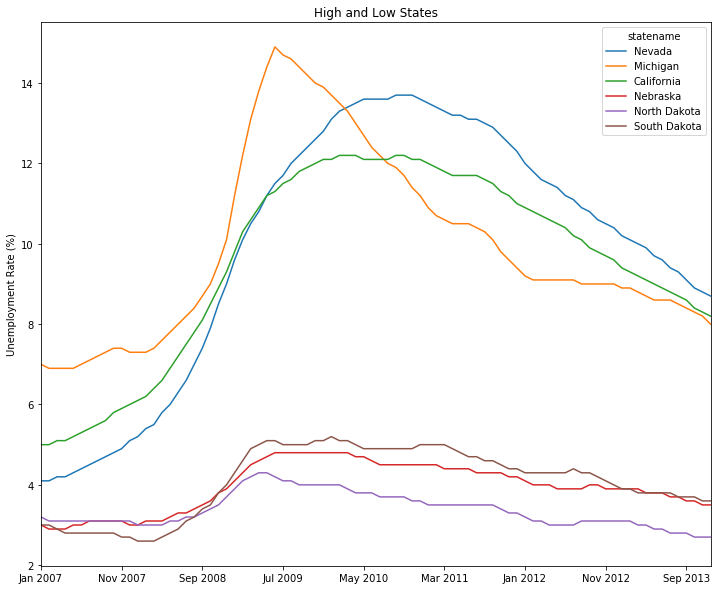

In [35]:
#Some high and low states
UnemploymentByStateHiLo = UnemploymentByStateTransposed[['Nevada','Michigan','California',
                                                    'Nebraska','North Dakota','South Dakota']]
UnemploymentByStateHiLoPlot = UnemploymentByStateHiLo.plot.line(legend=True,figsize=(12,10),
                                                               title='High and Low States')
UnemploymentByStateHiLoPlot.set_ylabel('Unemployment Rate (%)')
pp.show()